# Assignment 7

# LINEAR REGRESSION USING GRADIENT DESCENT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#generating dataset
def predictions(x,add_noise=False,mean =0,var = 0.25):
    if not add_noise:
        return x
    return x+np.random.normal(mean,var,x.shape)
x = np.linspace(-1,5,50)*1000

In [3]:
#normalizing x
x_transform = []
for i in range(len(x)):
    x_transform.append((x[i]-min(x))/(max(x)-min(x)))
x_transform = np.array(x_transform)
y = predictions(x_transform,True)

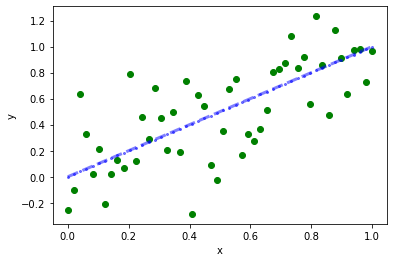

In [4]:
plt.scatter(x_transform,y,color = "green")
plt.plot(x_transform,x_transform,'bo--',linewidth = 3,markersize = 2,alpha = 0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
# Mean square error
def mse(yt,yp):
    return (np.sum((yt-yp)**2)/len(yt))

def updates(yt,yp,x,lr,m,c):
    m = m- lr*((-x)*(np.sum(yt-yp)/len(yt))*2)
    c = c- lr*((-1)*(np.sum(yt-yp)/len(yt))*2)

    return m,c

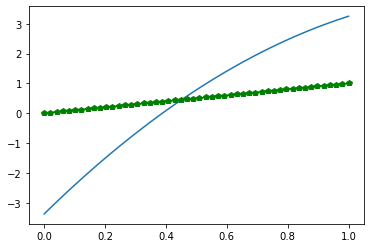

(2.984449932073809, 27.58777503974502)

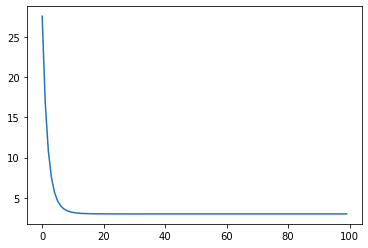

In [6]:
m,c = 10,0
lr = 0.1
total_loss = []
for i in range(100):
    yp = m*x_transform + c    
    loss = mse(y,yp)
    total_loss.append(loss)
    m,c = updates(y,yp,x_transform,lr,m,c)
plt.plot(x_transform,yp,label=i+1)

plt.plot(x_transform,x_transform,color='green',marker='p')
plt.show()

plt.plot(total_loss)
total_loss[-1], total_loss[0]

# LINEAR REGRESSION USING GRADIENT DESCENT FOR HOUSING DATA

In [7]:
#applying linear regression on boston housing dataset
data = pd.read_csv('Real estate.csv')
data.head(), data.columns

(   No  X1 transaction date  X2 house age  \
 0   1             2012.917          32.0   
 1   2             2012.917          19.5   
 2   3             2013.583          13.3   
 3   4             2013.500          13.3   
 4   5             2012.833           5.0   
 
    X3 distance to the nearest MRT station  X4 number of convenience stores  \
 0                                84.87882                               10   
 1                               306.59470                                9   
 2                               561.98450                                5   
 3                               561.98450                                5   
 4                               390.56840                                5   
 
    X5 latitude  X6 longitude  Y house price of unit area  
 0     24.98298     121.54024                        37.9  
 1     24.98034     121.53951                        42.2  
 2     24.98746     121.54391                        47.3  
 3     24.98

In [8]:
X = data[['X1 transaction date', 'X2 house age',
        'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
Y = data['Y house price of unit area']
X.shape

(414, 6)

In [9]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transform = sc.fit_transform(X)

In [10]:
#splitting test and train data
test_train_ratio = 0.2
num_testing_example = int(test_train_ratio*(X.shape[0]))
num_training_example = X.shape[0]-num_testing_example
X_train = X_transform[:num_training_example]
Y_train = Y[:num_training_example]
X_test = X_transform[num_training_example:]
Y_test = Y[num_training_example:]
X_test[0:5],Y_test[0:5]

(array([[ 0.06401736,  1.94111861, -0.36980649, -0.71182914,  0.54375306,
          0.09060904],
        [-1.41666719, -0.8711492 , -0.77668389,  0.30788458, -0.18475479,
          0.4768143 ],
        [-0.82368321,  1.07986159, -0.05596189,  0.30788458,  1.69661874,
          0.08082343],
        [ 1.54115111,  0.84257649, -0.59201438,  0.64778915, -0.38079843,
          0.4742048 ],
        [-1.1219506 , -1.1084343 ,  0.621416  , -0.71182914,  1.21336713,
         -1.03604041]]),
 332    39.6
 333    38.4
 334    22.8
 335    36.5
 336    35.6
 Name: Y house price of unit area, dtype: float64)

In [11]:
#initializing the variables
weight_vector = np.random.randn(X.shape[1])
intercept = 0
learning_rate = 0.001

In [12]:
#creating the MSE loss function
def loss(y,y_predicted):
    s = 0
    n = len(y)
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [13]:
#create function to predict y
def predicted_y(weight,x,intercept):
    y_list = []
    for i in range(len(x)):  
        y_list.append((weight@x[i])+intercept)
    return np.array(y_list)

In [14]:
#create function to differentiate weight
def dldw(x,y,y_predicted):
    n = len(y)
    s = 0
    for i in range(n):
        s+= (-x[i]*(y[i]-y_predicted[i]))
    return (2/n)*s

In [15]:
#create function to differentiate intercept
def dldb(y,y_predicted):
    n = len(y)
    s = 0
    for i in range(n):
        s+= (-(y[i]-y_predicted[i]))
    return (2/n)*s

In [16]:
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 10000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001
    for i in range(epoch):
        y_predicted = predicted_y(weight_vector,x,intercept)
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(epoch),linear_loss[:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    return weight_vector,intercept

In [17]:
weight_vector

array([ 0.185289  ,  0.47184427, -1.06584549, -0.2955879 ,  2.31176478,
        0.40096218])

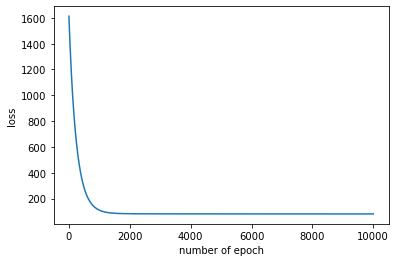

In [18]:
w,b=gradient_descent(X_train,Y_train)

In [19]:
def predict(inp):
    y_list = []
    for i in range(len(inp)):
        y_list.append(w@inp[i]+b)
    return y_list

In [24]:
y_pred = predict(X_test)
y_pred[0:5]

[32.83604024543024,
 43.19601494192038,
 39.96919957260633,
 41.54973115304131,
 38.1482395607154]

In [21]:
df_predict = pd.DataFrame({"Y_Actual":Y_test,"Y_predicted":np.round(y_pred,1)})
df_predict

,Y_Actual,Y_predicted
332,39.6,32.8
333,38.4,43.2
334,22.8,40.0
335,36.5,41.5
336,35.6,38.1
...,...,...
409,15.4,14.6
410,50.0,50.1
411,40.6,47.0
412,52.5,44.4


In [22]:
def accuracy(actual,predicted):
    corr_matrix = np.corrcoef(actual,predicted)
    corr = corr_matrix[0,1]
    R2 = corr**2
    return R2
accuracy(Y_test,y_pred)

0.5923343936452615

In [23]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.592074284170836